# California Housing Dataset

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading dataset
df = pd.read_excel("housing.xlsx")

In [10]:
df.shape #gives number of observations and features

(20640, 10)

In [11]:
# Print first 5 rows of data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [12]:
# Brief description of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


##### The above summary shows that there are 20,640 records in the whole dataset. Also, the 'total_bedrooms' attribute has only 20,433 NON-NULL values which means that 207 records have NULL values. We can also see that 'ocean_proximity' is not a numerical attribute.

In [14]:
# Summary of the numerical attributes Only
df.describe()
     

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Q1: What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot.


In [18]:
# Average meadian income of dataset
x=df["median_income"].mean()

print(f"The mean value of Median Income is {x}")

The mean value of Median Income is 3.8706710029069766


In [19]:
# Brief info of median_income column
df["median_income"].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

##### From the above info, it can be seen that median value is less than the mean, which indicates that the data is right skewed.

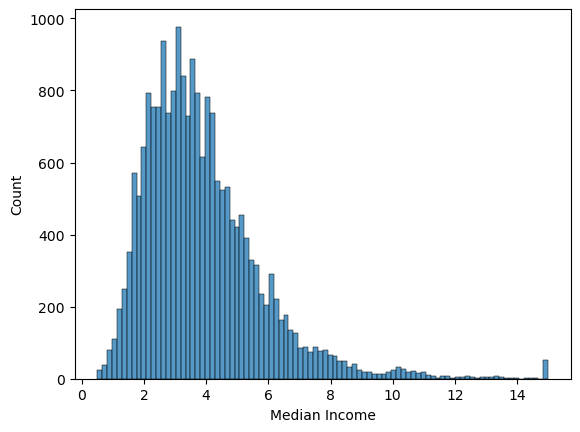

In [4]:
# Histogram Plot for median income
sns.histplot(df["median_income"])
plt.xlabel('Median Income')                     # Label of X-axis
plt.show()                                      # View Plot
     

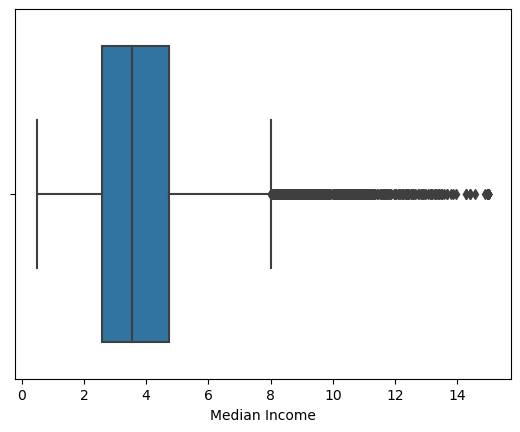

In [6]:
# Box-Whisker Plot for median income
sns.boxplot(data = df, x = "median_income")
plt.xlabel("Median Income")
plt.show()

#### Box-Whisker plot indicates that the outliers are present after a median income of near to 80,000 USD.

### Q2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.

In [16]:
df["housing_median_age"].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

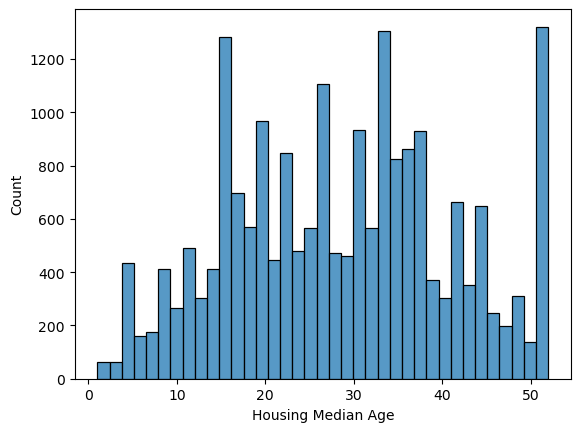

In [14]:
# Histogram plot for housing median age
sns.histplot(df["housing_median_age"])
plt.xlabel("Housing Median Age")
plt.show()  

#### The above plot mostly shows randomness. Although, there is a peak at the end which indicates that there is a capping limit on the maximum value of Housing Median Age.

### Q3. Show with the help of visualization, how median_income and median_house_values are related?

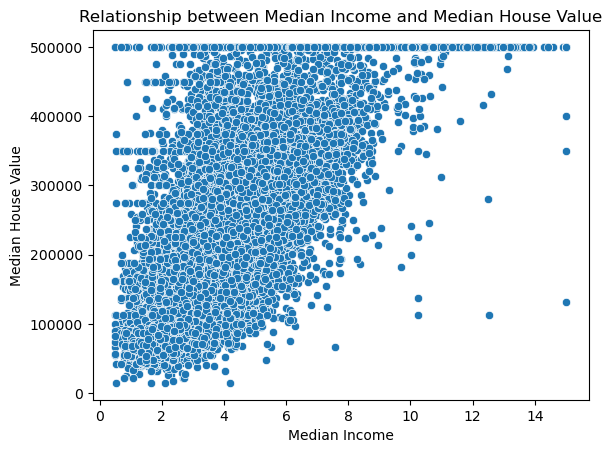

In [19]:
# Scatter Plot
sns.scatterplot(data = df, x= "median_income", y="median_house_value")
plt.xlabel("Median Income")                                               # Label of X-Axis
plt.ylabel("Median House Value")                                          # Label of Y-Axis
plt.title("Relationship between Median Income and Median House Value")    # Title of Plot

plt.show()

#### The above Scatter Plot shows a linear relationship between median_income and median_house_value.The line at the top of graph shows that there is a capping limit at maximum median house value. Some Outliers can also be seen in the data.

### Q4. Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.

In [20]:
# Total null records in total_bedrooms column
df["total_bedrooms"].isnull().sum()

207

In [27]:
# Specifying Condition on index of null records
remove= df[df["total_bedrooms"].isnull()].index
remove


Int64Index([  290,   341,   538,   563,   696,   738,  1097,  1350,  1456,
             1493,
            ...
            19932, 19959, 20046, 20069, 20125, 20267, 20268, 20372, 20460,
            20484],
           dtype='int64', length=207)

In [29]:
# Deleting null Records
new_df = df.drop(index = remove)

# Displaying new dataframe 
new_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


### Q5. Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.

In [4]:
# Brief overview of null records in attributes
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
# Mean of non-null values
m=df["total_bedrooms"].mean()
print(m)

537.8705525375617


In [9]:
# Filling missing records with mean value
df.loc[df["total_bedrooms"].isnull(), "total_bedrooms"] = m

In [11]:
# Checking the attributes for null records
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Q6. Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.

In [17]:
# Creating a user-defined function
def median_value(x):
  y = sorted(x)
  n = len(y)
  if(n%2 == 0):
    med = (y[(n-1)//2] + y[((n-1)//2)+1])/2
  else:
    med = y[n//2]
  return med

In [18]:
# Median of housing_median_age column
median_value(df['housing_median_age'])

29.0

In [19]:
# Verifying the above result
df['housing_median_age'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

### Q7. Plot latitude versus longitude and explain your observations.

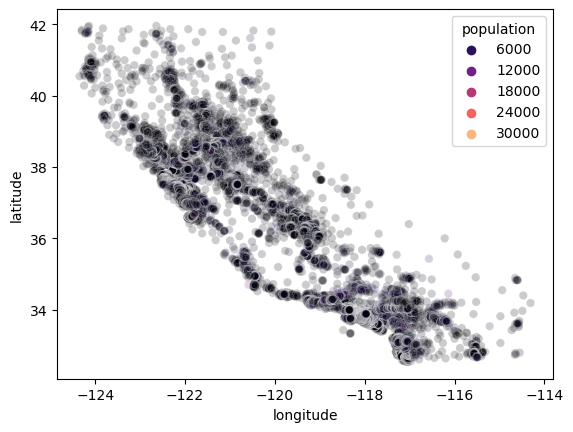

In [55]:
sns.scatterplot(x = df["longitude"], y = df["latitude"],hue = df["population"],palette = "magma",alpha=0.2)
plt.show()  #various color palettes are flare,crest,magma,rocket_r etc

#### The plots of the two form the shape of California. It is clear from the plots that there are some areas that are more densely populated than others.

### Q8. Create a data set for which the ocean_proximity is ‘Near ocean’.

In [31]:
# Summary of value counts 
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [33]:
# Creating a new dataframe from the specified condition
filt = (df["ocean_proximity"] == "NEAR OCEAN")      # Boolean Series
new_df = df[filt]
new_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,500001,NEAR OCEAN
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,321800,NEAR OCEAN
20423,-119.00,34.08,17,1822,438.0,578,291,5.4346,428600,NEAR OCEAN
20424,-118.75,34.18,4,16704,2704.0,6187,2207,6.6122,357600,NEAR OCEAN


### Q9. Find the mean and median of the median income for the data set created in question 8.

In [40]:
# Mean and median of above dataset
print("MEAN IS ",new_df["median_income"].mean())
print("MEDIAN IS ",new_df["median_income"].median())

MEAN IS  4.0057848006019565
MEDIAN IS  3.64705


### Q10. Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.

In [41]:
total_bedroom_size = []                     # Declaration of empty list

# Adding elements to list
for i in df["total_bedrooms"]:
    if (i <= 10):
      total_bedroom_size.append("Small")
    elif (i>10 and i <1000):
      total_bedroom_size.append("Medium")
    else:
      total_bedroom_size.append("Large")

In [ ]:
# Inserting list as a column in DataFrame
df.insert(5, "total_bedroom_size",total_bedroom_size)

In [43]:
# View DataFrame
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,total_bedroom_size,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,Medium,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,Large,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,Medium,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,Medium,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,Medium,565,259,3.8462,342200,NEAR BAY
